## Overview:
- This analysis focuses on data for 4 main provinces in Canada: Ontario, Quebec, British Columbia, and Alberta. The key variables being analyzed are household income (grouped in ranges) and number of people with post graduate degrees. All data is from the year 2020.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read files
income_data = pd.read_csv('CSV Resources/Income Ranges by Province.csv')
grad_school_data = pd.read_csv('CSV Resources/Grad_Canada_Data.csv')
gender_data = pd.read_csv('CSV Resources/Gender Type and Education Level.csv')

In [2]:
#Clean the csv files and save into dataframes for analysis
#Clean income data and set index:
income_data = income_data.rename(columns={'Unnamed: 0': 'Province'})
income_data_clean = income_data.set_index('Province')
income_data_clean

,Income Under 30k,Income 30k - 60k,Income 60k - 100k,Income 100k - 200k,Income Over 200k
Province,,,,,
Quebec,71580,443825,708890,885030,214080
Ontario,168780,661800,1047750,1531890,559445
Alberta,45100,171735,295590,470795,181425
British Columbia,64815,244590,376870,542310,170830
Total Counts,350275,1521950,2429100,3430025,1125780


In [3]:
# Clean graduate school data: remove all irrelevant rows and columns containing NaN and reset index:
grad_school_data = grad_school_data.dropna(axis='columns', how='all')
grad_school_clean = grad_school_data.dropna(axis='index', how='all')
grad_school_clean = grad_school_clean.reset_index(drop=True)
grad_school_clean

,"Highest certificate, diploma or degree",Canada,Quebec,Ontario,Alberta,British Columbia
0,"Degree in medicine, dentistry, veterinary medi...","214,110","43,755","90,530","23,875","32,985"
1,Master's degree,"1,740,600","360,795","786,435","164,245","264,145"
2,Earned doctorate,"279,665","63,275","119,120","27,315","43,440"
3,Total,"2,234,375","467,825","996,085","215,435","340,570"


In [4]:
# Rename columns to more relevant names and set index 
grad_school_df = grad_school_clean.rename(columns={'Highest certificate, diploma or degree': 'Highest Education'})
grad_school_df = grad_school_df.set_index('Highest Education')
grad_school_clean_df = grad_school_df.rename(index={'Degree in medicine, dentistry, veterinary medicine or optometry': 'Medical Degree', 
                                                    "Master's degree": "Master's Degree", 
                                                    'Earned doctorate ': 'Earned Doctorate'})
grad_school_clean_df

,Canada,Quebec,Ontario,Alberta,British Columbia
Highest Education,,,,,
Medical Degree,"214,110","43,755","90,530","23,875","32,985"
Master's Degree,"1,740,600","360,795","786,435","164,245","264,145"
Earned Doctorate,"279,665","63,275","119,120","27,315","43,440"
Total,"2,234,375","467,825","996,085","215,435","340,570"


In [5]:
# Check the data type of the dataframe and convert to integer
grad_school_clean_df.dtypes
grad_school_clean_df=grad_school_clean_df.replace(',', '', regex=True).astype(int)
grad_school_clean_df

,Canada,Quebec,Ontario,Alberta,British Columbia
Highest Education,,,,,
Medical Degree,214110,43755,90530,23875,32985
Master's Degree,1740600,360795,786435,164245,264145
Earned Doctorate,279665,63275,119120,27315,43440
Total,2234375,467825,996085,215435,340570


In [6]:
# Transpose and rename columns to reflect current order
grad_school_transposed = grad_school_clean_df.transpose()
grad_school_final = grad_school_transposed.rename_axis('Province')
grad_school_final = grad_school_final.rename(columns={'Total':'Total Post Grad Students'})
grad_school_final

Highest Education,Medical Degree,Master's Degree,Earned Doctorate,Total Post Grad Students
Province,,,,
Canada,214110,1740600,279665,2234375
Quebec,43755,360795,63275,467825
Ontario,90530,786435,119120,996085
Alberta,23875,164245,27315,215435
British Columbia,32985,264145,43440,340570


In [7]:
# Clean gender csv file and create a dataframe with only total population of the four main provinces
total_population = gender_data.loc[gender_data['Description']== 'Total population']
total_population = total_population.rename(columns={'Province/Territory':'Province'})
population_data = total_population.loc[(total_population['Province'] == 'Ontario') |
                                      (total_population['Province'] == 'Alberta') |
                                      (total_population['Province'] == 'British Columbia') |
                                      (total_population['Province'] == 'Quebec')]
population_data

,Province,Description,Total,Male,Female
16,Quebec,Total population,8501835,4201960,4299870
20,Ontario,Total population,14223945,6970855,7253085
32,Alberta,Total population,4262635,2127935,2134700
36,British Columbia,Total population,5000880,2457515,2543365


In [8]:
# Select relevant columns and make a new dataframe
final_population = population_data[['Province','Total']]
final_population = final_population.rename(columns={'Total': 'Total Population'})
final_population.set_index('Province')

,Total Population
Province,
Quebec,8501835
Ontario,14223945
Alberta,4262635
British Columbia,5000880


In [9]:
# Merge the datasets
merged_df = pd.merge(income_data_clean, grad_school_final, how='inner', on='Province')
merged_df

,Income Under 30k,Income 30k - 60k,Income 60k - 100k,Income 100k - 200k,Income Over 200k,Medical Degree,Master's Degree,Earned Doctorate,Total Post Grad Students
Province,,,,,,,,,
Quebec,71580,443825,708890,885030,214080,43755,360795,63275,467825
Ontario,168780,661800,1047750,1531890,559445,90530,786435,119120,996085
Alberta,45100,171735,295590,470795,181425,23875,164245,27315,215435
British Columbia,64815,244590,376870,542310,170830,32985,264145,43440,340570


In [10]:
combined_df = pd.merge(merged_df, final_population, how='inner', on='Province')
combined_df = combined_df.set_index('Province')
combined_df

,Income Under 30k,Income 30k - 60k,Income 60k - 100k,Income 100k - 200k,Income Over 200k,Medical Degree,Master's Degree,Earned Doctorate,Total Post Grad Students,Total Population
Province,,,,,,,,,,
Quebec,71580,443825,708890,885030,214080,43755,360795,63275,467825,8501835
Ontario,168780,661800,1047750,1531890,559445,90530,786435,119120,996085,14223945
Alberta,45100,171735,295590,470795,181425,23875,164245,27315,215435,4262635
British Columbia,64815,244590,376870,542310,170830,32985,264145,43440,340570,5000880


In [11]:
# Analysis: calculate the number of post grad students per capita
combined_df['Post Grad Per Capita'] = combined_df['Total Post Grad Students'] / combined_df['Total Population']

# Calculate the ratio of people earning 100k - 200k to the total population
combined_df['100k - 200k Per Capita'] = combined_df['Income 100k - 200k'] / combined_df['Total Population']
combined_df

,Income Under 30k,Income 30k - 60k,Income 60k - 100k,Income 100k - 200k,Income Over 200k,Medical Degree,Master's Degree,Earned Doctorate,Total Post Grad Students,Total Population,Post Grad Per Capita,100k - 200k Per Capita
Province,,,,,,,,,,,,
Quebec,71580,443825,708890,885030,214080,43755,360795,63275,467825,8501835,0.055026,0.104099
Ontario,168780,661800,1047750,1531890,559445,90530,786435,119120,996085,14223945,0.070029,0.107698
Alberta,45100,171735,295590,470795,181425,23875,164245,27315,215435,4262635,0.050540,0.110447
British Columbia,64815,244590,376870,542310,170830,32985,264145,43440,340570,5000880,0.068102,0.108443


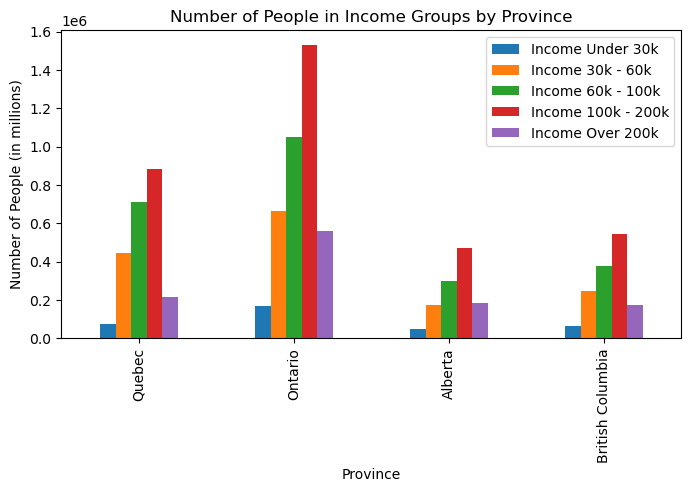

In [12]:
# Question 1: How is income distributed across the four Provinces? Plot a graph to show this.
income_graph = combined_df[['Income Under 30k', 'Income 30k - 60k', 'Income 60k - 100k', 
                            'Income 100k - 200k', 'Income Over 200k']]
income_graph.plot(kind='bar', figsize= (8, 4),
                 title = 'Number of People in Income Groups by Province',
                 xlabel = 'Province',
                 ylabel = 'Number of People (in millions)')

# Save as image
plt.savefig('Outputs/Income_Distribution.png')

plt.show()

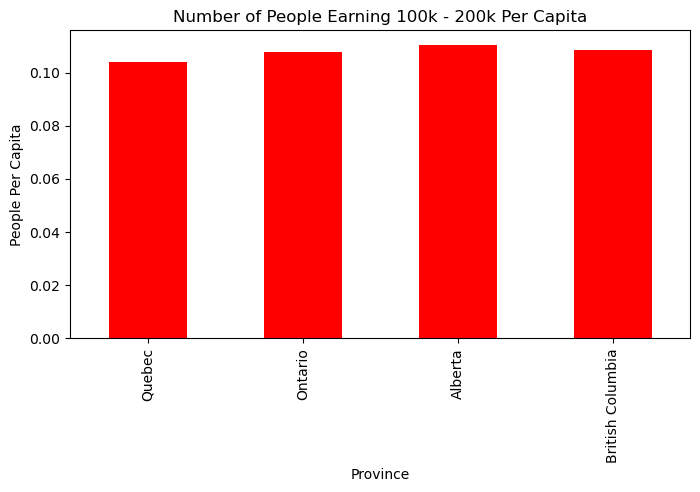

In [13]:
# From the graph, select the mode income group for each province and find the ratio to total population
# Plot a graph to show the disparity/difference across provinces for that income group
income_percapita_graph = combined_df['100k - 200k Per Capita']
income_percapita_graph.plot(kind='bar', color='r', figsize= (8, 4),
                 title = 'Number of People Earning 100k - 200k Per Capita',
                 xlabel = 'Province',
                 ylabel = 'People Per Capita')

# Save as image
plt.savefig('Outputs/Income_Percapita.png')

plt.show()

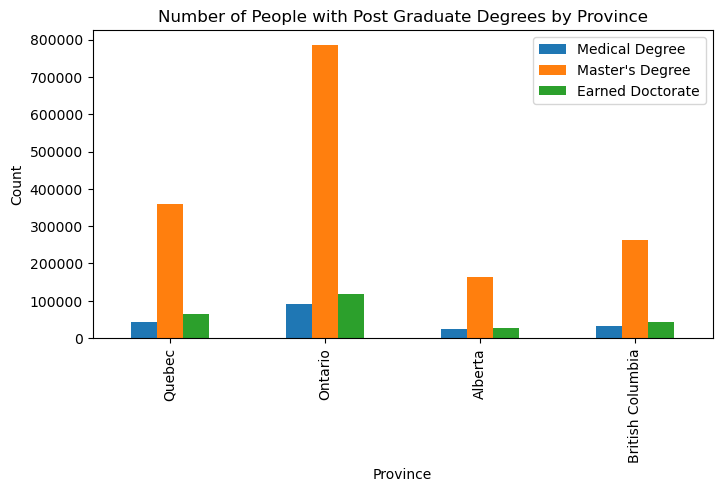

In [14]:
# Question 2: How are post graduate degree holders distributed across the 4 Provinces? Plot a graph to show this.
grad_graph = combined_df[['Medical Degree', "Master's Degree", 'Earned Doctorate']] 
grad_graph.plot(kind='bar',figsize= (8, 4),
                 title = 'Number of People with Post Graduate Degrees by Province',
                 xlabel = 'Province',
                 ylabel = 'Count')
# Save as image
plt.savefig('Outputs/PostGrad_Distribution.png')

plt.show()

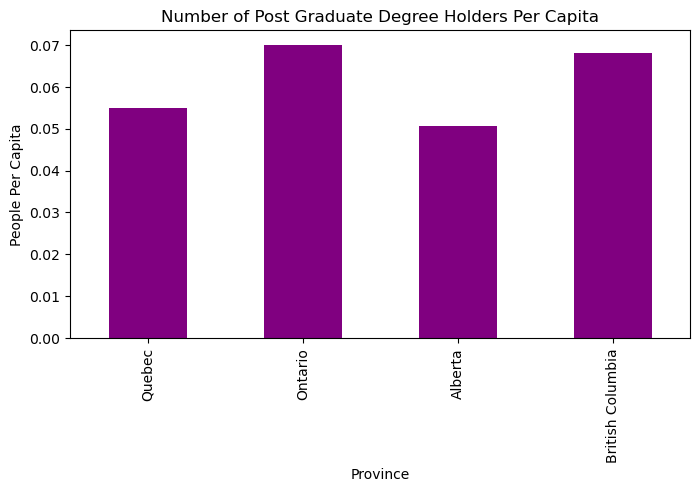

In [15]:
# How does this distribution reflect compared to total population of each province?
grad_percapita_graph = combined_df['Post Grad Per Capita']
grad_percapita_graph.plot(kind='bar', figsize= (8, 4),color='purple',
                 title = 'Number of Post Graduate Degree Holders Per Capita',
                 xlabel = 'Province',
                 ylabel = 'People Per Capita')

# Save as image
plt.savefig('Outputs/PostGrad_Percapita.png')

plt.show()